In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv("dataset.csv")
X = df.loc[:, df.columns != 'TOTEXPPQ']
X['INCOME'] = np.log(X['INCOME'] + 1)
y = np.log(df.TOTEXPPQ + 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 31)

C:\Users\wayne\AppData\Local\Temp\ipykernel_532\3222341909.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['INCOME'] = np.log(X['INCOME'] + 1)


In [2]:
def cal_scores(pred,act):
    mae = np.mean(np.abs(pred - act.values))
    mse = np.mean((pred - act.values)**2)
    rmse = np.sqrt(np.mean((pred - act.values)**2))
    print("MSE: " + str(mse))
    print("MAE: " + str(mae))
    print("RMSE: " + str(rmse))

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

regr = RandomForestRegressor()
grid = {'max_depth':[10+2*i for i in np.arange(0,46)]}
regr = GridSearchCV(regr, grid, scoring='neg_mean_absolute_error')
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

-0.36864659441203884


In [4]:
cal_scores(regr.predict(X_test),y_test)

MSE: 0.24304528273676881
MAE: 0.36864659441203884
RMSE: 0.4929962299417398


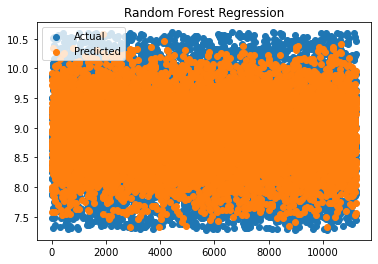

In [5]:
y_pred_regr = regr.predict(X_test)
plt.scatter(np.arange(len(X_test)),y_test,label = 'Actual')
plt.scatter(np.arange(len(X_test)),y_pred_regr,label = 'Predicted')
plt.title('Random Forest Regression')
plt.legend()

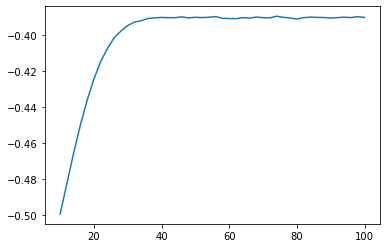

In [6]:
x = [i for i in range(10,101,2)]
plt.plot(x,regr.cv_results_['mean_test_score'])